In [1]:
import sys
from matplotlib import pyplot
import os
import azureml
from azureml.core import Experiment
from azureml.core import Environment
from azureml.core import Workspace, Datastore, Dataset
ws = Workspace.from_config()
print("Azure ML SDK Version: ", azureml.core.VERSION)
print(ws.name, ws.location, ws.resource_group, sep='\t')
from azureml.core import Experiment
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException
from azureml.core.conda_dependencies import CondaDependencies

Azure ML SDK Version:  1.22.0
machinelearninglab	canadacentral	rg_machine_learning


In [2]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPool2D, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.optimizers import SGD, Adam
import sqlite3
import yaml
import csv
import numpy
import math
import cv2

Using TensorFlow backend.


In [3]:
from azureml.core import Workspace, Dataset

subscription_id = '103da3c6-1089-4d2b-8b1d-5159e8f5ffc5'
resource_group = 'RG_Machine_Learning'
workspace_name = 'MachineLearningLab'

workspace = Workspace(subscription_id, resource_group, workspace_name)

#datasetImages = Dataset.get_by_name(workspace, name='roadImages4800')
#datasetImages.download(target_path='./images', overwrite=True)

#datasetYaml = Dataset.get_by_name(workspace, name='yamlDataset4800')
#datasetYaml.download(target_path='./yaml', overwrite=True)

#datasetImages = Dataset.get_by_name(workspace, name='100roadImages')
#datasetImages.download(target_path='./test', overwrite=True)


In [4]:
#this takes about 7 minutes to run: loads in all the data from the files - don't run unless you need it
from PIL import Image
img_array = []
dictYaml = []
fileYaml = ''
listOfEverything = []
data_tuple = ()
counter = 0
for fileImg in os.listdir('images'):
    #print(fileImg)
    imageFilePlace = 'images/'+fileImg
    fileYaml = fileImg[:-4]+'.yaml'
    yamlFilePlace = 'yaml/'+fileYaml
    #print(fileYaml)
    with open(os.fsdecode(yamlFilePlace)) as filey:
        dictYaml = yaml.safe_load(filey)
        #print(dictYaml)
    img = Image.open(imageFilePlace)
    img_array = numpy.array(img)
    data_tuple = (img_array, dictYaml)
    listOfEverything.append(data_tuple)
    print(counter)
    counter+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
import random
import pickle
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from cv2 import cvtColor, GaussianBlur
from PIL import Image
print("Tensorflow version " + tf.__version__)
print('Keras Version '+ keras.__version__)
print("Running on GPU:", tf.test.is_built_with_cuda())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

#DO THIS WHEN YOUR COMPUTE HAS GPU POWER
#gpus= tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

Tensorflow version 2.1.0
Keras Version 2.3.1
Running on GPU: True
Num GPUs Available:  0


In [7]:
def makeListOfX0(listEverything):
    listX0 = []
    for item in listEverything:
        listX0.append(item[1]['X0'])
    return listX0

In [8]:
def makeListOfYAW0(listEverything):
    listYAW0 = []
    for item in listEverything:
        listYAW0.append(item[1]['YAW0'])
    return listYAW0

In [9]:
def makeListOfZ0(listEverything):
    listZ0 = []
    for item in listEverything:
        listZ0.append(item[1]['Z0'])
    return listZ0

In [10]:
def makeListOfCamHeight(listEverything):
    listCamHeight = []
    for item in listEverything:
        listCamHeight.append(item[1]['cam_height'])
    return listCamHeight

In [11]:
def makeListOfDy(listEverything):
    listDy = []
    for item in listEverything:
        listDy.append(item[1]['dy'])
    return listDy

In [12]:
def makeListOfFocalLength(listEverything):
    listFocalLength = []
    for item in listEverything:
        listFocalLength.append(item[1]['focal_length'])
    return listFocalLength

In [13]:
def makeListOfInvRad(listEverything):
    listInvRad = []
    for item in listEverything:
        listInvRad.append(item[1]['inv_rad'])
    return listInvRad

In [14]:
def makeListOfRoadWidth(listEverything):
    listRoadWidth = []
    for item in listEverything:
        listRoadWidth.append(item[1]['road_width'])
    return listRoadWidth

In [15]:
def makeListOfStraight(listEverything):
    listStraight = []
    for item in listEverything:
        listStraight.append(item[1]['straight'])
    return listStraight

In [16]:
def makeImageList(listEverything):
    imList = []
    for item in listEverything:
        imList.append(item[0])
    return imList

In [17]:
def trainAndTestSplit(listEverything, splitPercent):
    train, test = train_test_split(listEverything, test_size = splitPercent)
    return train, test

In [18]:
def prepPixels(listEverything):
    listNew = []
    current = 0
    for item in listEverything:
        itemNew0 = item[0].astype('float32')
        itemNew0 = item[0]/255
        item_tuple = (itemNew0, item[1])
        current+=1
        #print(current)
        listNew.append(item_tuple)
    return listNew

In [19]:
import time
def runTime(startTime):
    currentTime = time.perf_counter()
    hours = (int)((currentTime - startTime) / 3600)
    minutes = (int)(((currentTime - startTime) - (3600 * hours)) / 60)
    seconds = (int)((currentTime - startTime) - (3600 * hours) - (60 * minutes))
    
    print("\n__Time__", "\nHours:", hours, "\nMinutes:", minutes, "\nSeconds:", seconds)

In [20]:
#only run once per start
list0 = prepPixels(listOfEverything)
 

In [21]:
#only run once per kernel start
train, test = trainAndTestSplit(list0, 0.4)
trainX = makeImageList(train)
trainYforYAW0 = makeListOfYAW0(train)
trainYforRoadWidth = makeListOfRoadWidth(train)
crossVal, test = trainAndTestSplit(test, 0.5)
testX = makeImageList(test)
testYforYAW0 = makeListOfYAW0(test)
testYforRoadWidth = makeListOfRoadWidth(test)
crossValX = makeImageList(crossVal)
crossValYforYAW0 = makeListOfYAW0(crossVal)
crossValYforRoadWidth = makeListOfRoadWidth(crossVal)
import gc
del list0
del train
del test
del crossVal
gc.collect()


22

In [22]:
def modelCreate():
    model =Sequential()

    model.add(Conv2D(3, (5,5), strides=(2,2), input_shape = (480,640,3), activation='elu'))
    
    model.add(Dropout(0.2))


    model.add(Conv2D(24, (5,5), strides=(2,2), activation='elu'))


    model.add(Conv2D(36, (5,5), strides=(2,2), activation='elu'))


    model.add(Conv2D(48, (3,3), strides=(2,2), activation='elu'))


    model.add(Conv2D(64, (3,3), strides=(2,2), activation='elu'))



    model.add(Flatten())

    #next adjustment would be to remove the dropout above and change the activation
    model.add(Dense(1164, activation='elu'))
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    
    model.add(Dense(1))
    
    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
        
    print(model)

    return model

In [23]:
startTime = time.perf_counter()
modelOutputDir = os.getcwd()

model = modelCreate()
print('Model has been created')
trainX = numpy.array(trainX)
testX = numpy.array(testX)
crossValX = numpy.array(crossValX)
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False)
datagen.fit(trainX)
itTrain = datagen.flow(trainX, trainYforRoadWidth, batch_size=64)
steps = int(trainX.shape[0] / 64)
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(modelOutputDir, 'laneNavModelRoadWidth.h5'), verbose=1, save_best_only=True)
print('checkpoint callback done')

history = model.fit_generator(itTrain,
                              steps_per_epoch=steps,
                              epochs=5,
                              validation_data=(crossValX,crossValYforRoadWidth),
                              verbose=1,
                              shuffle=1,)
print('history is done')

#model.fit(trainX, trainYforYAW0, epochs=10, batch_size=64, verbose=0)
model.save(os.path.join(modelOutputDir, 'laneNavModelRoadWidth.h5'))
print('model has been saved')

runTime(startTime)

Model has been created
checkpoint callback done
Epoch 1/5
45/45 [==============================] - 151s 3s/step - loss: 7.3193 - val_loss: 0.1888
Epoch 2/5
45/45 [==============================] - 138s 3s/step - loss: 0.1118 - val_loss: 0.0937
Epoch 3/5
45/45 [==============================] - 396s 9s/step - loss: 0.0988 - val_loss: 0.0874
Epoch 4/5
45/45 [==============================] - 142s 3s/step - loss: 0.0955 - val_loss: 0.0838
Epoch 5/5
45/45 [==============================] - 142s 3s/step - loss: 0.0900 - val_loss: 0.0818
history is done
model has been saved

__Time__ 
Hours: 0 
Minutes: 16 
Seconds: 47


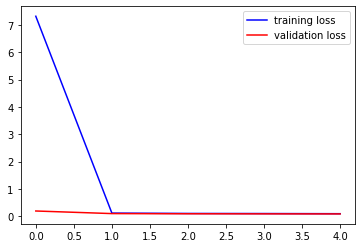

In [26]:
pyplot.plot(history.history['loss'], color='blue')
pyplot.plot(history.history['val_loss'], color='red')
pyplot.legend(['training loss', 'validation loss'])

In [27]:

model = load_model('laneNavModelRoadWidth.h5')

#def prepComputeImage(imageTest):
    #imageTest = numpy.array(imageTest)
    #imageTest = imageTest.astype('float32')
    #imageTest = imageTest/255
    #params = model.predict(imageTest)
    #return params
#print(trainX.shape)

#testing = testX[5]
#testing = numpy.array(testing)
#testing = testing.reshape(1,480,640,3)

#print(model.predict(testing))
#print(testYforYAW0[5])
current = 0
totalPercentError = 0

for item in testX:
    item = numpy.array(item)
    item = item.reshape(1,480,640,3)
    prediction = model.predict(item)
    print(prediction)
    print(testYforRoadWidth[current])
    totalPercentError+=(abs((testYforRoadWidth[current]-prediction)/testYforRoadWidth[current]))*100
    current+=1
print('done')
print(totalPercentError/960)
print(testX.shape)

[[4.9499607]]
4.623690656226183
[[5.0697837]]
4.9236197279208085
[[4.9635653]]
4.638873663696441
[[4.9362264]]
4.89537314656992
[[4.97492]]
4.610648269022839
[[4.9633207]]
5.189853114187249
[[4.9794464]]
4.585517200907011
[[4.970863]]
4.792520952394651
[[4.981197]]
5.237967385428057
[[4.9772263]]
5.46832794959333
[[5.0586734]]
4.641087823531407
[[5.0278015]]
5.346128685181102
[[4.9883404]]
4.524574696969645
[[4.983973]]
5.296382416584548
[[5.0543056]]
5.4678483904638036
[[4.9799237]]
4.570191614268837
[[5.0664687]]
4.576737263333029
[[4.972794]]
4.727349547318129
[[4.9642916]]
4.8441644378959
[[4.9579577]]
4.67941768902607
[[5.0608964]]
4.656200075062909
[[4.9678674]]
5.252697162073444
[[4.9786468]]
4.625969691176368
[[5.042086]]
5.450186719419941
[[4.982262]]
5.014206019120664
[[4.9752254]]
4.947008788333147
[[4.960133]]
4.5863572056008435
[[5.0902686]]
5.018370054195001
[[4.939693]]
5.227172786914452
[[5.094571]]
5.066895590589514
[[5.031343]]
4.658167133246212
[[4.976029]]
4.9354084